In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

% matplotlib inline

In [30]:
base = "../../weekly_updates/aug14/run-ap_{}_08_0{}_1_{}-tag-total_loss.csv"
folder = "../../weekly_updates/aug14/"

In [4]:
ap_train = {}
ap_eval = {}

In [11]:
ap_train["lstm"] = pd.read_csv(base.format("lstm","7","train"))
ap_train["simplernn"] = pd.read_csv(base.format("simplernn","7","train"))
ap_train["u"] = pd.read_csv(base.format("u","7","train"))
ap_train["d1"] = pd.read_csv(base.format("d1","8","train"))
ap_train["r1"] = pd.read_csv(base.format("r1","8","train"))

In [14]:
ap_eval["lstm"] = pd.read_csv(base.format("lstm","7","eval"))
ap_eval["simplernn"] = pd.read_csv(base.format("simplernn","7","eval"))
ap_eval["u"] = pd.read_csv(base.format("u","7","eval"))
ap_eval["d1"] = pd.read_csv(base.format("d1","8","eval"))
ap_eval["r1"] = pd.read_csv(base.format("r1","8","eval"))

In [21]:
colors = {"lstm":"tab:blue", "simplernn":"tab:orange","u":"tab:green",
          "d1":"tab:red", "r1":"tab:purple"}

/Users/heidihurst/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=True).mean()
/Users/heidihurst/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=True).mean()


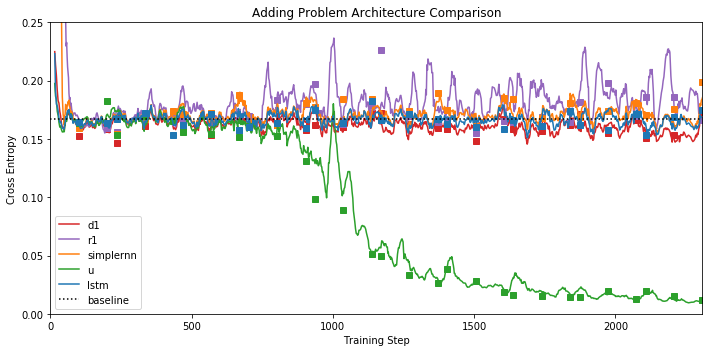

In [32]:
plt.figure(figsize=(10,5))

window=10

for key in ap_train.keys():
    plt.plot(pd.rolling_mean(ap_train[key].Step, window, center=True), 
             pd.rolling_mean(ap_train[key].Value, window, center=True), 
             color=colors[key], label=key)
    plt.plot(ap_eval[key].Step, ap_eval[key].Value, "s", color=colors[key], label='_nolegend_')
    
plt.plot(np.linspace(0,2307), 50*[0.167], ':', color="black", label="baseline")

plt.title("Adding Problem Architecture Comparison")
plt.ylabel("Cross Entropy")
plt.xlabel("Training Step")

plt.ylim([0,0.25])
plt.xlim([0,2307])

plt.legend()

plt.tight_layout()

plt.savefig(folder+"ap_train_rolling_mean_{}.png".format(window), dpi=300)

plt.show()

In [38]:
base = "../../weekly_updates/aug14/run-mnist_{}_08_{}_{}_{}-tag-total_loss.csv"
folder = "../../weekly_updates/aug14/"

In [39]:
mnist_train = {}
mnist_eval = {}

In [42]:
mnist_train["lstm"] = pd.read_csv(base.format("lstm","12","3","train"))
mnist_train["simplernn"] = pd.read_csv(base.format("simplernn","13",1,"train"))
mnist_train["u"] = pd.read_csv(base.format("u",13,2,"train"))
mnist_train["d1"] = pd.read_csv(base.format("d1",13,1,"train"))
mnist_train["r1"] = pd.read_csv(base.format("r1",13,1,"train"))

/Users/heidihurst/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=True).mean()
/Users/heidihurst/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=True).mean()


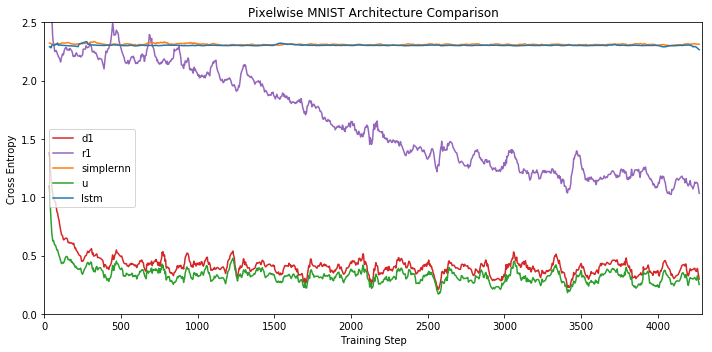

In [45]:
plt.figure(figsize=(10,5))

window=10

for key in mnist_train.keys():
    plt.plot(pd.rolling_mean(mnist_train[key].Step, window, center=True), 
             pd.rolling_mean(mnist_train[key].Value, window, center=True), 
             color=colors[key], label=key)

plt.title("Pixelwise MNIST Architecture Comparison")
plt.ylabel("Cross Entropy")
plt.xlabel("Training Step")

plt.ylim([0,2.5])
plt.xlim([0,4290])

plt.legend()

plt.tight_layout()

plt.savefig(folder+"mnist_train_rolling_mean_{}.png".format(window), dpi=300)

plt.show()